# kNN（k最近傍法）

入力$x$に最も近い$k$個の訓練データ$x_1,x_2,\dots,x_k$のサンプルの平均を使って予測するシンプルな機械学習アルゴリズム

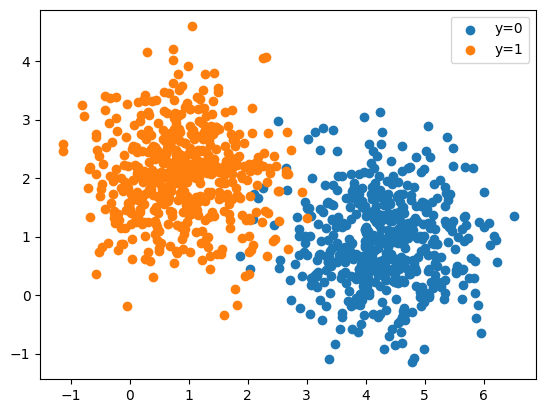

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
n_samples = 1000
n_classes = 2
X, y = make_blobs(n_samples=n_samples, centers=n_classes, cluster_std=0.8, random_state=0)
X = X[:, ::-1]

fig, ax = plt.subplots()
for label in np.unique(y):
    idx = y == label
    ax.scatter(X[idx, 0], X[idx, 1], label=f"y={label}")
ax.legend()
fig.show()

In [129]:
k = 10

def predict(x_test: np.array) -> int:
    # testのデータ点と訓練データの点の距離
    distances = np.linalg.norm(X_train - x_test, axis=1)
    neighbors_idx = np.argsort(distances)[:k]
    neighbors = y_train[neighbors_idx]
    proba = np.mean(neighbors)
    y_pred = 1 * (proba >= 0.5)
    return y_pred

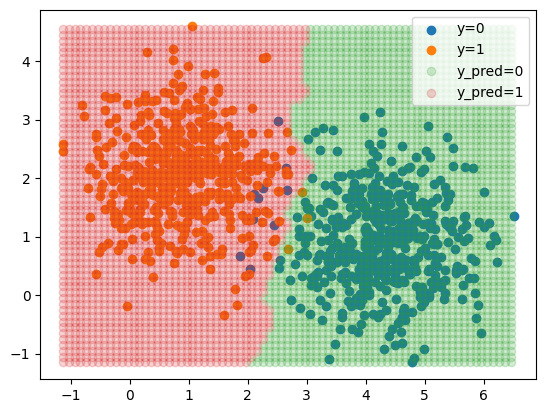

In [130]:
# 識別境界を簡単に描画

# 格子状のデータ点
import numpy as np
from itertools import product

x0 = np.arange(X[:, 0].min(), X[:, 0].max(), 0.1)
x1 = np.arange(X[:, 1].min(), X[:, 1].max(), 0.1)
X_grid = np.array(list(product(x0, x1)))

# 予測
y_pred = np.array([predict(x) for x in X_grid])

# plot
fig, ax = plt.subplots()
# datapoints
for label in np.unique(y):
    idx = y == label
    ax.scatter(X[idx, 0], X[idx, 1], label=f"y={label}")

# prediction
for label in np.unique(y_pred):
    idx = y_pred == label
    ax.scatter(X_grid[idx, 0], X_grid[idx, 1], label=f"y_pred={label}", alpha=0.2)
ax.legend()
fig.show()

## k=0

仮想的に$k=0$と置いた0近傍法が理論上の最適レートを達成するらしい。

- [論文解説：仮想的な0近傍法による高次バイアス補正 | Jxiv](https://jxiv.jst.go.jp/index.php/jxiv/preprint/view/945)
